In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
## Create a synthetic data points
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

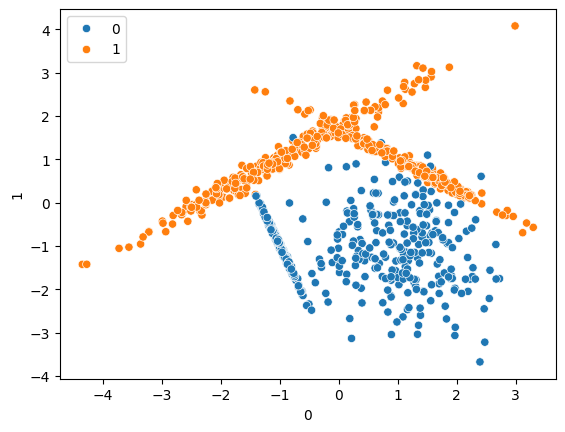

In [87]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], data=pd.DataFrame(X), hue=y)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 )

In [89]:
from sklearn.svm import SVC

In [90]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [91]:
y_pred = svc.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       117
           1       0.95      0.95      0.95       133

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[110   7]
 [  6 127]]


In [94]:
##RBF Kernel

rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)

SVC()

In [95]:
y_pred1 = rbf.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       117
           1       0.97      0.99      0.98       133

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[113   4]
 [  1 132]]


In [100]:
##Polynomial kernel
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
y_pred2 = poly.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       117
           1       0.97      0.90      0.93       133

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[113   4]
 [ 13 120]]


In [102]:
##Sigmoid kernel
sig = SVC(kernel='sigmoid')
sig.fit(X_train, y_train)
y_pred3 = poly.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       117
           1       0.97      0.90      0.93       133

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[113   4]
 [ 13 120]]


In [103]:
##We got better value in rbf kernel
# Now param hypertuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[0, 1, 10, 100, 1000, 0.1],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']
    
}

In [106]:
grid=GridSearchCV(SVC(), param_grid = param_grid, refit=True, cv=5, verbose=3, n_jobs=-1)

In [107]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_con

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 10, 100, 1000, 0.1],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [108]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [109]:
y_pred4 = grid.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       117
           1       0.97      0.90      0.93       133

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[113   4]
 [ 13 120]]
